In [43]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/uk_own/'

#results_dir = 'exp1_results/'
#graph_xlim = (0, 13)
#graph_ylim = (3, 9)
#gridsize = 1000

#results_dir = 'exp2_results/'
#graph_xlim = (-1, 15)
#graph_ylim = (2, 25)
#gridsize = 1000

#results_dir = 'exp3_results/'
#graph_xlim = (0, 13)
#graph_ylim = (3, 9)
#gridsize = 1000

results_dir = 'exp4_results/'
graph_xlim = (-2, 15)
graph_ylim = (-1, 20)
gridsize = 200

#results_dir = 'exp5a_results/'
#graph_xlim = (-3, 8)
#graph_ylim = (0, 9)
#gridsize = 200

#results_dir = 'exp5b_results/'
#graph_xlim = (-3, 8)
#graph_ylim = (0, 9)
#gridsize = 200

#results_dir = 'exp6_results/'
#graph_xlim = (-5, 15)
#graph_ylim = (-2, 17)
#gridsize = 2000

#results_dir = 'exp7_results/'
#graph_xlim = (0, 14)
#graph_ylim = (0, 6)
#gridsize = 400

#results_dir = 'exp8_results/'
#graph_xlim = (-5, 30)
#graph_ylim = (-20, 15)
#gridsize = 1000

# exp1, exp2, exp3, exp4,
dimension_names_to_visualize = ['Left - economy - Right', 'People over elites (salience)']

#   exp5a, exp5b, exp6
#dimension_names_to_visualize = ['Opposes redistribution', 'Left - ideology - Right']

# exp7, exp8
#dimension_names_to_visualize = ['Favors immigration restrictions', 'EU integration party dissent']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# FranceOwn
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'UKOwn_reference_group.csv'
group_attitudes_file = data_dir + 'UKOwn_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'UK'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

['ches2019_lrecon', 'ches2019_antielite_salience']


In [44]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_eu_position,ches2019_eu_position_sd,ches2019_eu_salience,ches2019_eu_dissent,ches2019_eu_blur,ches2019_eu_cohesion,ches2019_eu_foreign,ches2019_eu_intmark,ches2019_eu_budgets,...,ches2019_nationalism,ches2019_urban_rural,ches2019_protectionism,ches2019_regions,ches2019_russian_interference,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,ches2019_antielite_salience,ches2019_corrupt_salience,ches2019_members_vs_leadership
0,0,3.649870,-0.203845,6.122315,-3.696552,2.899767,2.714331,3.653606,1.356391,3.325373,...,5.449761,2.547601,10.133547,3.198138,3.505411,3.448436,13.028073,8.885967,4.770458,4.315210
1,1,3.764555,1.233474,4.919550,8.089981,7.698716,4.989889,3.298021,3.895918,3.059193,...,2.658570,3.123952,7.914085,3.443563,2.742957,2.414773,4.583335,5.992782,1.222127,2.924338
2,2,-5.707287,-2.301464,3.380497,-16.220080,4.432557,-6.294825,-1.507699,-10.183004,-2.209427,...,19.634388,2.971669,20.092857,5.565124,3.544464,7.697552,31.131238,19.806460,10.448808,11.747037
3,3,4.330423,0.066703,6.010863,-2.161229,3.065265,3.613353,4.080301,2.276218,3.703483,...,4.409466,2.694327,9.553977,2.817366,3.436133,3.018904,11.325829,8.097764,4.054565,3.687806
4,4,-2.361953,-1.794315,2.996613,-14.237263,4.547715,-3.232522,0.768801,-6.983301,-0.006149,...,15.002757,1.970077,18.771080,3.732968,3.855913,5.936615,27.816993,17.146952,9.513971,8.727720


In [45]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(565, 49)
(565, 51)
(527, 52)
(527, 57)


,entity,ches2019_eu_position,ches2019_eu_position_sd,ches2019_eu_salience,ches2019_eu_dissent,ches2019_eu_blur,ches2019_eu_cohesion,ches2019_eu_foreign,ches2019_eu_intmark,ches2019_eu_budgets,...,ches2019_corrupt_salience,ches2019_members_vs_leadership,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay
0,0,5.137573,0.549872,6.446045,1.190526,3.175379,4.873230,4.416125,3.938254,4.057473,...,2.595814,3.303947,0,0,Labour,blue,-0.1,0.2,0.1,0.1
1,1,1.607712,0.880695,4.742404,7.499332,9.977798,2.994580,1.966817,2.380612,1.913988,...,2.608722,5.531151,1,0,Labour,blue,-0.1,0.2,0.1,0.1
2,9,0.926511,0.389270,4.663252,3.837150,9.165310,1.820880,1.705128,0.891330,1.606257,...,3.923289,6.195244,9,0,Labour,blue,-0.1,0.2,0.1,0.1
3,12,6.512386,0.887382,7.478700,3.936345,2.774593,6.121980,4.948426,5.904941,4.804497,...,1.544597,2.226137,12,0,Labour,blue,-0.1,0.2,0.1,0.1
4,15,4.235685,1.357635,6.418826,9.875517,7.963463,5.317233,3.355150,5.677137,3.398674,...,0.941450,4.179473,15,0,Labour,blue,-0.1,0.2,0.1,0.1


In [46]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,Conservative,232
1,Green Party,1
2,Labour,174
3,Labour (Co-op),28
4,Liberal Democrat,39
5,Plaid Cymru,3
6,Scottish National Party,49
7,UK Independence Party,1


In [47]:
group_names_df.head(20)

,k,party
0,0,Labour
1,1,Conservative
2,2,Scottish National Party
3,3,Liberal Democrat
4,4,Labour (Co-op)
13,13,Plaid Cymru
15,15,Green Party
16,16,UK Independence Party


In [48]:
# also load/compute dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(17, 3)
(8, 8)


,ches2019_lrecon,ches2019_antielite_salience,party,color,dim_x,dim_y,dim_ax,dim_ay
0,1.941176,4.937500,Labour,blue,-0.1,0.2,0.1,0.1
1,7.058824,7.000000,Conservative,green,-0.1,-0.3,0.1,0.1
2,3.363636,4.222222,Plaid Cymru,#CD6090,-0.2,-0.3,0.1,0.1
3,2.117647,5.066667,Green Party,magenta,0.2,0.0,0.1,0.1
4,7.733333,8.812500,UK Independence Party,orange,0.2,0.0,0.1,0.1
5,3.437500,5.333333,Scottish National Party,#8968CD,0.2,0.0,0.1,0.1
6,4.470588,3.600000,Liberal Democrat,red,-0.1,0.2,0.1,0.1
7,1.941176,4.937500,Labour (Co-op),yellow,-0.1,0.2,0.1,0.1


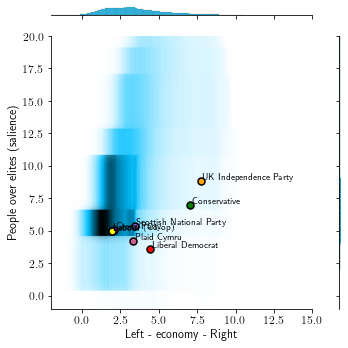

In [49]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_ax']), float(row['dim_ay']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim,
                 joint_kws = dict(gridsize = gridsize)) 

#for _, row in parliamentarians_df.iterrows(): # TODO
#    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', fontsize = 9)
                          #bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          
g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

#txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
#plt.legend(handles = ideo_legend_small, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.show()

#plt.savefig('Figures/AttitudinalSpace/ARF_lrgen_enviroment_bio_nucleaire.pdf')
#plt.clf()
#plt.close()